# **LeafSense**🌿 - Plant Disease Detection System

---

> **Abstract**

This project presents ***LeafSense***, an AI-driven system for automatic detection of plant leaf diseases using image classification. It leverages ***Convolutional Neural Networks (CNNs)*** to classify plant health from leaf images, aiming to support **early diagnosis** and reduce crop damage.


> **Objective**

To develop an AI-based deep learning model that assists farmers and agricultural professionals in accurately identifying plant diseases early through leaf image classification, enabling timely and effective intervention.


> **Methodology**

The project uses the ***PlantVillage* dataset** and a CNN-based architecture trained on color images of leaves. Data preprocessing is performed using **image augmentation and normalization**. The model is evaluated on validation data and tested using unseen samples to assess accuracy.

---

**Technologies Used:**

- **Dataset:** PlantVillage Dataset (Kaggle)
- **Deep Learning Frameworks:** TensorFlow, Keras
- **Data Manipulation:** NumPy
- **Image Processing:** OpenCV, Pillow
- **Data Augmentation:** Keras ImageDataGenerator
- **Visualization:** Matplotlib
- **Machine Learning Utilities:** Scikit-learn
- **Development Environment:** Google Colab

---


# Environment Setup


> Upload files and install necessary libraries and set random seeds for reproducibility.






In [1]:
# Upload the main.py

from google.colab import files
uploaded = files.upload()

Saving main.py to main.py


In [2]:
# Upload the class_indices.json

from google.colab import files
uploaded = files.upload()

Saving class_indices.json to class_indices.json


In [3]:
# 📦 Install Required Libraries

# - Deep learning: TensorFlow, Keras
# - Data manipulation: NumPy
# - Image processing: OpenCV, Pillow
# - Visualization: Matplotlib
# - Machine learning utilities: Scikit-learn

!pip install tensorflow keras numpy matplotlib opencv-python pillow scikit-learn

In [4]:
# 🎲 Set Random Seeds for Reproducibility
# Ensures that experiments produce consistent results

import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)



> Import essential Python libraries for data processing, visualization, and model building.



In [5]:
# 🔧 System & File Handling
import os
import json
from zipfile import ZipFile

# 🖼️ Image Handling
from PIL import Image

# 📊 Data Manipulation & Visualization
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 🔁 Data Preprocessing & Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 🧠 Building the CNN Model
from tensorflow.keras import layers, models

# Kaggle Dataset Setup


> Kaggle API configuration, dataset download, directory and file structure exploration.



In [6]:
# ⬇️ Install and Configure Kaggle API

!pip install kaggle

In [7]:
# Upload Kaggle API key (kaggle.json) to authenticate

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"avishekjha23","key":"fd9d2a5e5121db65f3e413fcbd28413d"}'}



> Upload Kaggle API credentials and download the PlantVillage dataset.



In [8]:
# Load Kaggle API token from the uploaded JSON file

kaggle_credentials = json.load(open("kaggle.json"))

In [9]:
# Set environment variables for Kaggle authentication

os.environ['KAGGLE_USERNAME'] = kaggle_credentials["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentials["key"]

In [10]:
# Download the dataset from Kaggle using the dataset identifier

!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.02G/2.04G [00:15<00:00, 39.1MB/s]
100% 2.04G/2.04G [00:15<00:00, 143MB/s] 


In [11]:
# List the contents of the current directory to verify download

!ls

class_indices.json  kaggle.json  main.py  plantvillage-dataset.zip  sample_data


In [12]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [13]:
# Print the main folders inside the extracted dataset
print("Main folders in 'plantvillage dataset':")
print(os.listdir("plantvillage dataset"))


# 🔍 Segmented Folder Exploration
print("\nTotal segmented folders (by class):")
print(len(os.listdir("plantvillage dataset/segmented")))
print("First 5 folders in 'segmented':")
print(os.listdir("plantvillage dataset/segmented")[:5])


# 🌈 Color Folder Exploration
print("\nTotal color folders (by class):")
print(len(os.listdir("plantvillage dataset/color")))
print("First 5 folders in 'color':")
print(os.listdir("plantvillage dataset/color")[:5])


# ⚫ Grayscale Folder Exploration
print("\nTotal grayscale folders (by class):")
print(len(os.listdir("plantvillage dataset/grayscale")))
print("First 5 folders in 'grayscale':")
print(os.listdir("plantvillage dataset/grayscale")[:5])

Main folders in 'plantvillage dataset':
['grayscale', 'color', 'segmented']

Total segmented folders (by class):
38
First 5 folders in 'segmented':
['Corn_(maize)___Common_rust_', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Raspberry___healthy', 'Potato___Late_blight', 'Grape___Esca_(Black_Measles)']

Total color folders (by class):
38
First 5 folders in 'color':
['Corn_(maize)___Common_rust_', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Raspberry___healthy', 'Potato___Late_blight', 'Grape___Esca_(Black_Measles)']

Total grayscale folders (by class):
38
First 5 folders in 'grayscale':
['Corn_(maize)___Common_rust_', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Raspberry___healthy', 'Potato___Late_blight', 'Grape___Esca_(Black_Measles)']


In [14]:
# Count and display the number of images in the 'Grape___healthy' folder
num_grape_healthy_images = len(os.listdir("plantvillage dataset/color/Grape___healthy"))
print(f"Number of images in 'Grape___healthy': {num_grape_healthy_images}")


# Show the first 5 image file names in the 'Grape___healthy' folder
print("Sample image files in 'Grape___healthy':")
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

Number of images in 'Grape___healthy': 423
Sample image files in 'Grape___healthy':
['d966ee8e-abdc-4841-94a5-ae1bed9da16c___Mt.N.V_HL 9094.JPG', '4e7ca108-2631-452b-83bb-be0a7b32d98f___Mt.N.V_HL 6063.JPG', '8f2cf5e7-ee7e-4a6e-84d2-5ac4bdb2e33f___Mt.N.V_HL 6099.JPG', 'fe54a9e2-461a-457b-a391-f6e3cc99605c___Mt.N.V_HL 9093.JPG', '18830d61-997d-438c-bd24-4dd427a45c4d___Mt.N.V_HL 6123.JPG']


In [15]:
# Set the base directory path for the colored plant leaf images dataset
base_dir = 'plantvillage dataset/color'

# Image Visualization


> Display sample images from the dataset to understand the input data.



Image shape: (256, 256, 3)


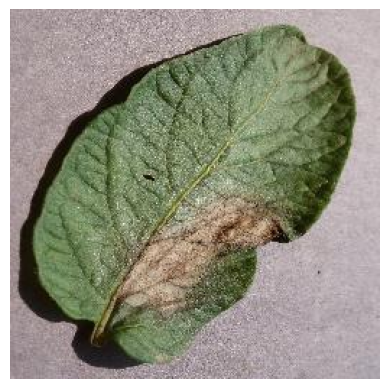

In [16]:
# Specify a sample image path from the dataset
image_path = '/content/plantvillage dataset/color/Potato___Late_blight/025f3c76-6d6c-4dad-ba22-e3e72d084ef1___RS_LB 3105.JPG'

# Load the image using matplotlib's image reader
img = mpimg.imread(image_path)
print(f"Image shape: {img.shape}")

# Display the image
plt.imshow(img)
plt.axis('off')  # No axis for cleaner visualization
plt.show()

In [17]:
# 🔍 Segmented Folder Exploration
print("\nTotal segmented folders (by class):")
print(len(os.listdir("plantvillage dataset/segmented")))

print("First 5 folders in 'segmented':")
print(os.listdir("plantvillage dataset/segmented")[:5])


# Reload sample image from the 'color' folder for display/debug
image_path = '/content/plantvillage dataset/color/Potato___Late_blight/025f3c76-6d6c-4dad-ba22-e3e72d084ef1___RS_LB 3105.JPG'


# Read the image
img = mpimg.imread(image_path)


# Print image pixel array for debugging or inspection
print(img)


Total segmented folders (by class):
38
First 5 folders in 'segmented':
['Corn_(maize)___Common_rust_', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Raspberry___healthy', 'Potato___Late_blight', 'Grape___Esca_(Black_Measles)']
[[[160 145 148]
  [171 156 159]
  [164 149 152]
  ...
  [192 180 182]
  [191 179 181]
  [191 179 181]]

 [[170 155 158]
  [182 167 170]
  [175 160 163]
  ...
  [196 184 186]
  [197 185 187]
  [197 185 187]]

 [[155 140 143]
  [173 158 161]
  [173 158 161]
  ...
  [199 187 189]
  [199 187 189]
  [198 186 188]]

 ...

 [[162 147 152]
  [161 146 151]
  [156 141 146]
  ...
  [171 164 171]
  [173 166 173]
  [176 169 176]]

 [[164 149 154]
  [173 158 163]
  [171 156 161]
  ...
  [172 165 172]
  [170 163 170]
  [170 163 170]]

 [[163 148 153]
  [179 164 169]
  [179 164 169]
  ...
  [171 164 171]
  [167 160 167]
  [165 158 165]]]


# Define Image Parameters and Data Generators


> Set image size and batch size. Create data generators for training and validation with augmentation.



In [18]:
# Image Parameters
img_size = 224   # Target image size for the CNN input (height and width)
batch_size = 32  # Number of images to process in each batch during training/testing

In [19]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [20]:
# Train Generator

# Create an ImageDataGenerator for rescaling pixel values and splitting dataset into training and validation
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [21]:
# Create validation data generator to load images from the validation subset
validation_generator = data_gen.flow_from_directory(
    base_dir,                          # Path to dataset directory
    target_size=(img_size, img_size),  # Resize images to 224x224
    batch_size=batch_size,             # Number of images per batch
    subset='validation',               # Use validation split portion
    class_mode='categorical'           # Use categorical labels (one-hot encoded)
)

Found 10849 images belonging to 38 classes.


# Build CNN Model


> Define a sequential CNN architecture for classification.



In [22]:
# 🏗️ CNN Model Architecture

model = models.Sequential()

# 1st Convolutional Layer + Max Pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

# 2nd Convolutional Layer + Max Pooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

# Flatten feature maps to a 1D vector for fully connected layers
model.add(layers.Flatten())

# Fully Connected Layer with 256 units and ReLU activation
model.add(layers.Dense(256, activation='relu'))

# Output Layer with number of classes neurons and softmax activation for multi-class classification
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

# Compile Model


> Compile the model with optimizer, loss function, and evaluation metrics.



In [24]:
# 🛠️ Compile the Model

# Using Adam optimizer for efficient training
# Loss function: categorical_crossentropy for multi-class classification
# Metric: accuracy to monitor model performance

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model


> Train using training set and validate on the validation set.



In [25]:
# 🚀 Train the Model

# Training the CNN on the training data generator
# - steps_per_epoch defines how many batches per epoch
# - epochs defines how many times the model sees the full training data
# - validation_data and validation_steps are used to evaluate the model after each epoch

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,       # Number of steps per epoch
    epochs=5,                                                    # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 103s 71ms/step - accuracy: 0.6039 - loss: 1.6255 - val_accuracy: 0.8735 - val_loss: 0.4056
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 131s 66ms/step - accuracy: 0.9234 - loss: 0.2439 - val_accuracy: 0.8733 - val_loss: 0.4034
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 143s 67ms/step - accuracy: 0.9668 - loss: 0.1051 - val_accuracy: 0.8871 - val_loss: 0.4084
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 137s 64ms/step - accuracy: 0.9769 - loss: 0.0724 - val_accuracy: 0.8875 - val_loss: 0.4785
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 145s 66ms/step - accuracy: 0.9827 - loss: 0.0540 - val_accuracy: 0.8731 - val_loss: 0.6016


# Evaluate Model Performance


> Trained model's evaluation of accuracy on the validation data.



In [26]:
# 🧪 Model Evaluation

print("Evaluating model on validation data...")

# Evaluate the model performance on validation dataset
val_loss, val_accuracy = model.evaluate(
    validation_generator,
    steps=validation_generator.samples // batch_size
)

print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model on validation data...
339/339 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.8714 - loss: 0.6036
Validation Accuracy: 87.32%


# Visualize Training History


> Plot accuracy and loss curves to analyze model performance over epochs.



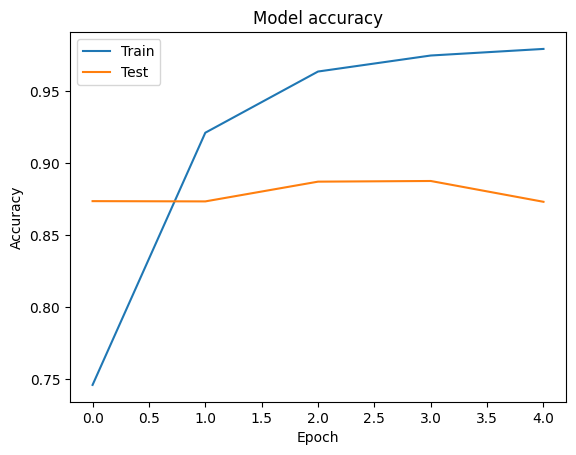

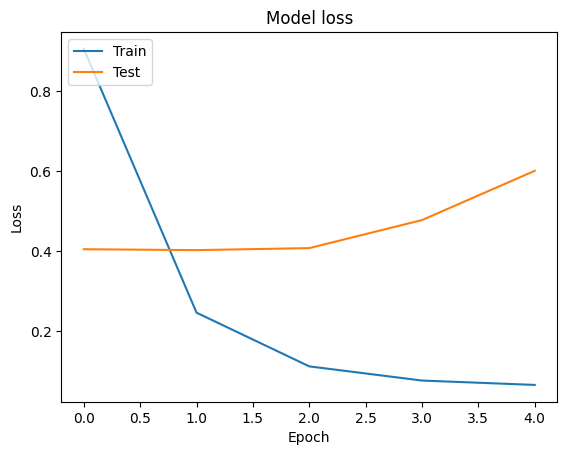

In [27]:
# 📊 Plot Training & Validation Metrics

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Prediction Utilities


> Functions to load, preprocess an image and predict the class using the trained model.



In [28]:
# 🖼️ Image Loading & Preprocessing Function


def load_and_preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path)                    # Load the image
    img = img.resize(target_size)                   # Resize image to target size
    img_array = np.array(img)                       # Convert the image to a numpy array
    img_array = np.expand_dims(img_array, axis=0)   # Add batch dimension (1, height, width, channels)
    img_array = img_array.astype('float32') / 255.  # Normalize pixel values to range [0, 1]
    return img_array


# 🔮 Image Class Prediction Function
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)     # Preprocess the input image
    predictions = model.predict(preprocessed_img)                # Perform prediction with the model
    predicted_class_index = np.argmax(predictions, axis=1)[0]    # Get the index of the highest prediction score
    predicted_class_name = class_indices[predicted_class_index]  # Map the index to the class label name
    return predicted_class_name

# Save Class Indices Mapping


> Save the mapping of class indices to class names for later use.



In [29]:
# 🔄 Create Class Index to Class Name Mapping

# Invert the dictionary returned by train_generator.class_indices
# Original: {class_name: index}
# Inverted: {index: class_name}
class_indices = {v: k for k, v in train_generator.class_indices.items()}

# Display the mapping
print(class_indices)

{0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy', 4: 'Blueberry___healthy', 5: 'Cherry_(including_sour)___Powdery_mildew', 6: 'Cherry_(including_sour)___healthy', 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 8: 'Corn_(maize)___Common_rust_', 9: 'Corn_(maize)___Northern_Leaf_Blight', 10: 'Corn_(maize)___healthy', 11: 'Grape___Black_rot', 12: 'Grape___Esca_(Black_Measles)', 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 14: 'Grape___healthy', 15: 'Orange___Haunglongbing_(Citrus_greening)', 16: 'Peach___Bacterial_spot', 17: 'Peach___healthy', 18: 'Pepper,_bell___Bacterial_spot', 19: 'Pepper,_bell___healthy', 20: 'Potato___Early_blight', 21: 'Potato___Late_blight', 22: 'Potato___healthy', 23: 'Raspberry___healthy', 24: 'Soybean___healthy', 25: 'Squash___Powdery_mildew', 26: 'Strawberry___Leaf_scorch', 27: 'Strawberry___healthy', 28: 'Tomato___Bacterial_spot', 29: 'Tomato___Early_blight', 30: 'Tomato___Late_blight', 31: 'To

In [30]:
# 💾 Save Class Indices Mapping to JSON

# Save the class index-to-name mapping to a JSON file for future reference
with open('class_indices.json', 'w') as json_file:
    json.dump(class_indices, json_file)

print("Class indices mapping saved to 'class_indices.json'")

Class indices mapping saved to 'class_indices.json'


# Sample Prediction

In [31]:
# 🔍 Example Prediction on a Single Image
image_path = '/content/plantvillage dataset/color/Potato___Late_blight/025f3c76-6d6c-4dad-ba22-e3e72d084ef1___RS_LB 3105.JPG'

# Predict the disease class of the image
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Display the prediction result
print("Predicted Class Name:", predicted_class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 946ms/step
Predicted Class Name: Potato___Early_blight


# Save the Model


> Save the trained model to Google drive or local for future use or deployment.



In [32]:
# Mount Google Drive for Saving Model

# from google.colab import drive
# drive.mount('/content/drive')

# Save properly
model.save('/content/drive/MyDrive/COA/LeafSense_model.h5')

In [33]:
# Save the trained model locally as an H5 file
model.save('LeafSense_model.h5')

In [34]:
# Download the saved model file to local machine
from google.colab import files
files.download("LeafSense_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>